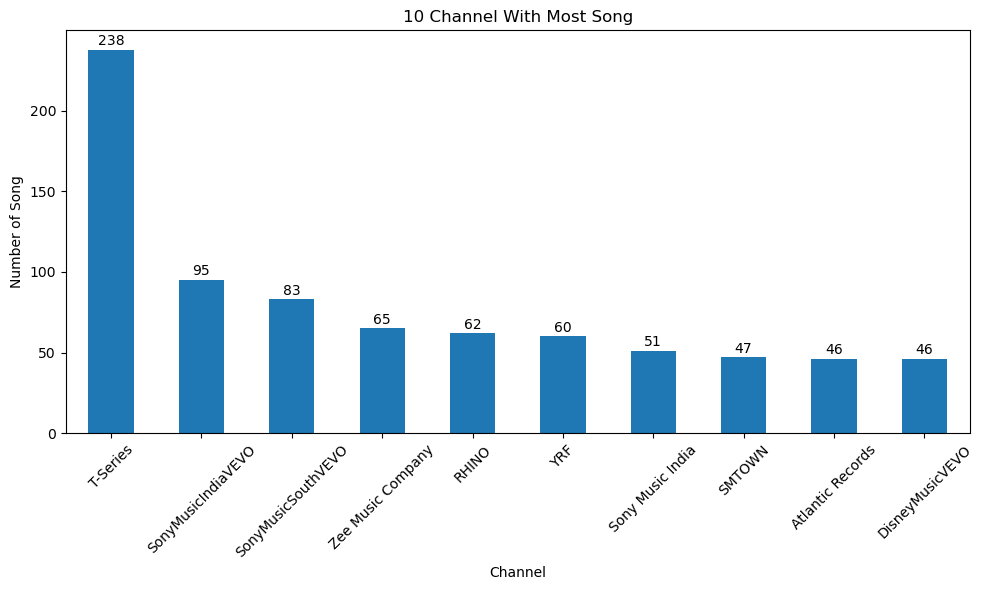

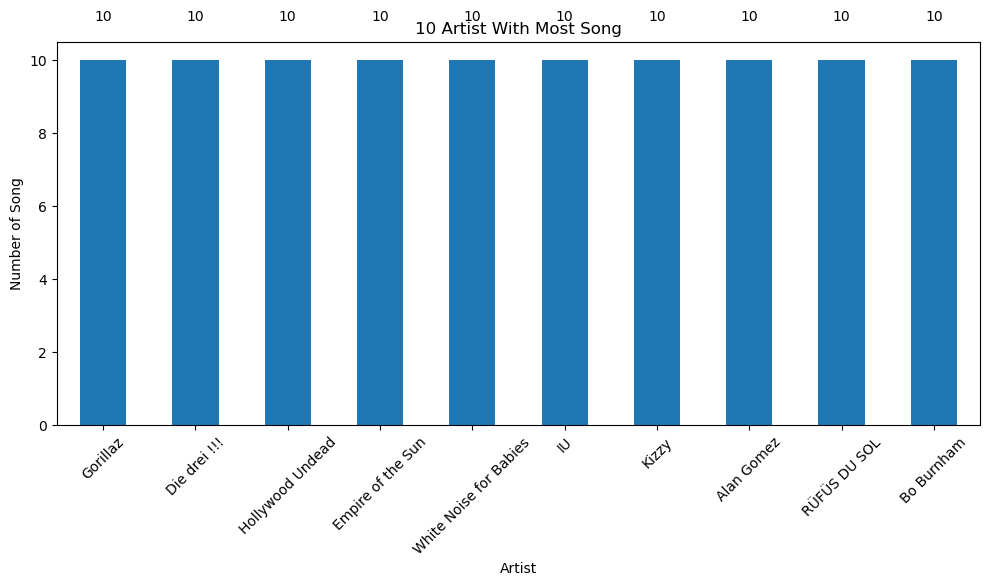

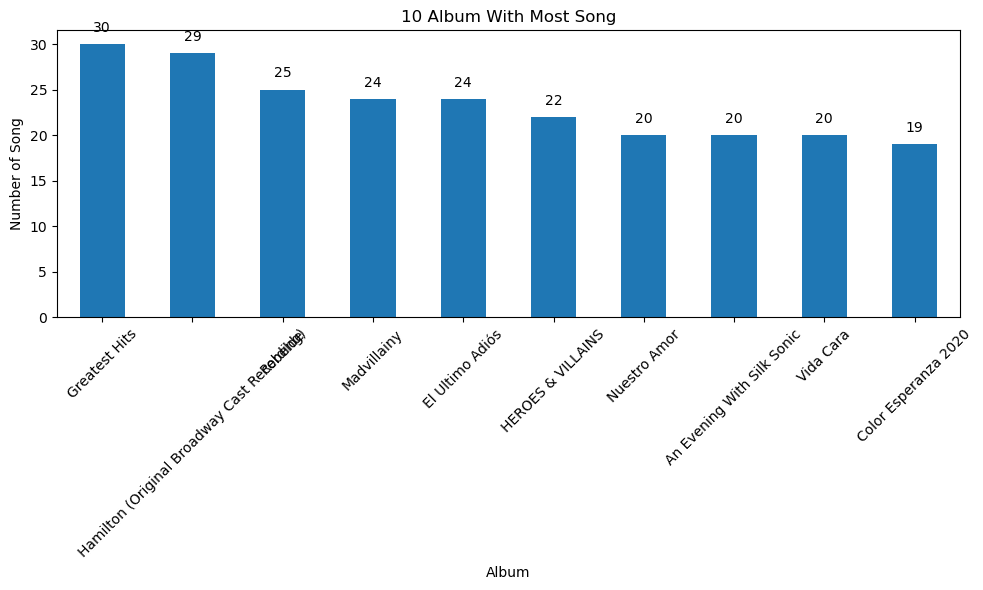

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Bar Chart 10 Context With Most Song
df = pd.read_csv("Spotify Youtube Dataset.csv")

list_col = ['Channel','Artist','Album']

for dt in list_col:
    # Dataset
    top_context = df[dt].value_counts().head(10)
    
    # Bar Chart
    plt.figure(figsize=(10, 6))
    ax = top_context.plot(kind='bar')
    # Add label
    for i, value in enumerate(top_context):
        plt.text(i, value + 1, str(value), ha='center', va='bottom')
    plt.title(f"10 {dt} With Most Song")
    plt.xlabel(dt)
    plt.ylabel("Number of Song")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

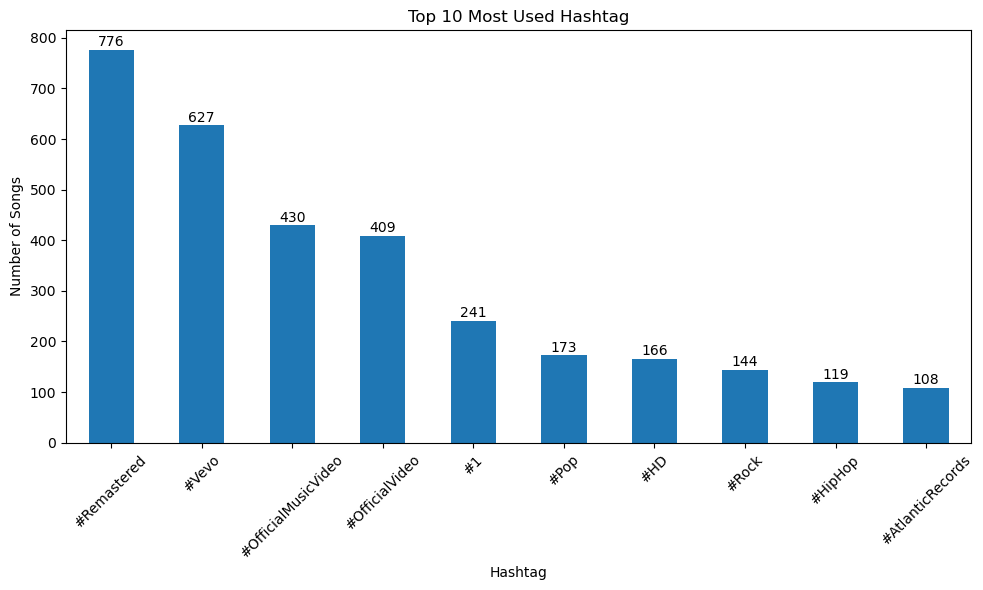

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Most Used Hashtag
df = pd.read_csv("Spotify Youtube Dataset.csv")

# Dataset
# Extract hashtags from Description
df['hashtags'] = df['Description'].apply(
    lambda x: re.findall(r"#\w+", str(x))  # find all words starting with "#"
)

# Split into rows
hashtags_series = df['hashtags'].explode()

# Count 
top_hashtags = hashtags_series.value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_hashtags.plot(kind='bar')
# Add label
for i, value in enumerate(top_hashtags):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Top 10 Most Used Hashtag")
plt.xlabel("Hashtag")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

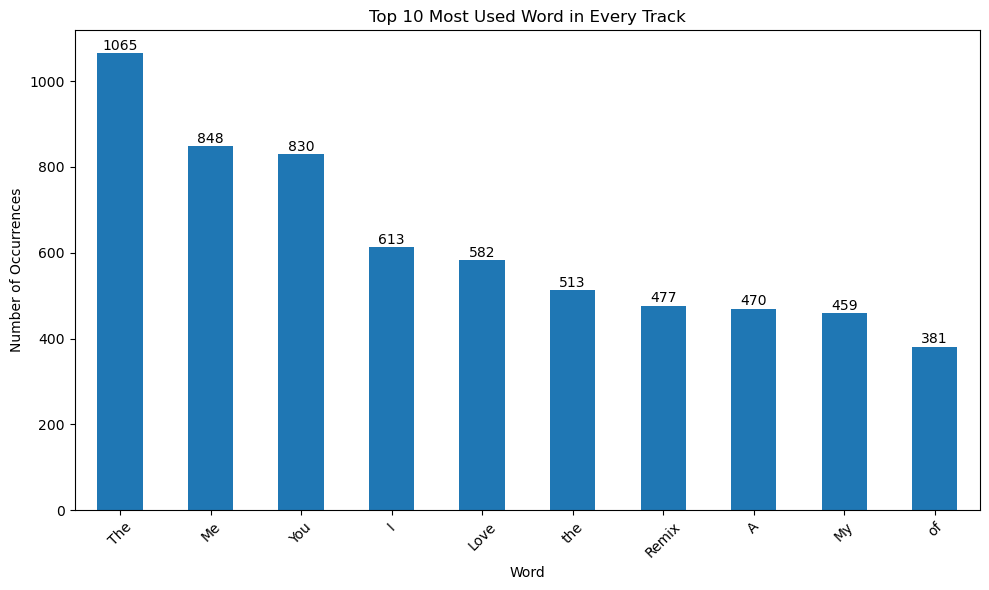

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Most Used Word in Every Track
df = pd.read_csv("Spotify Youtube Dataset.csv")

# Dataset
# Extract words from Track column and clean
df['words'] = df['Track'].apply(
    lambda x: [w for w in str(x).split(" ") if w.isalpha() and w.lower() != "(feat."]  
)

# Split into rows
words_series = df['words'].explode()

# Count 
top_words = words_series.value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_words.plot(kind='bar')
# Add label
for i, value in enumerate(top_words):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Top 10 Most Used Word in Every Track")
plt.xlabel("Word")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

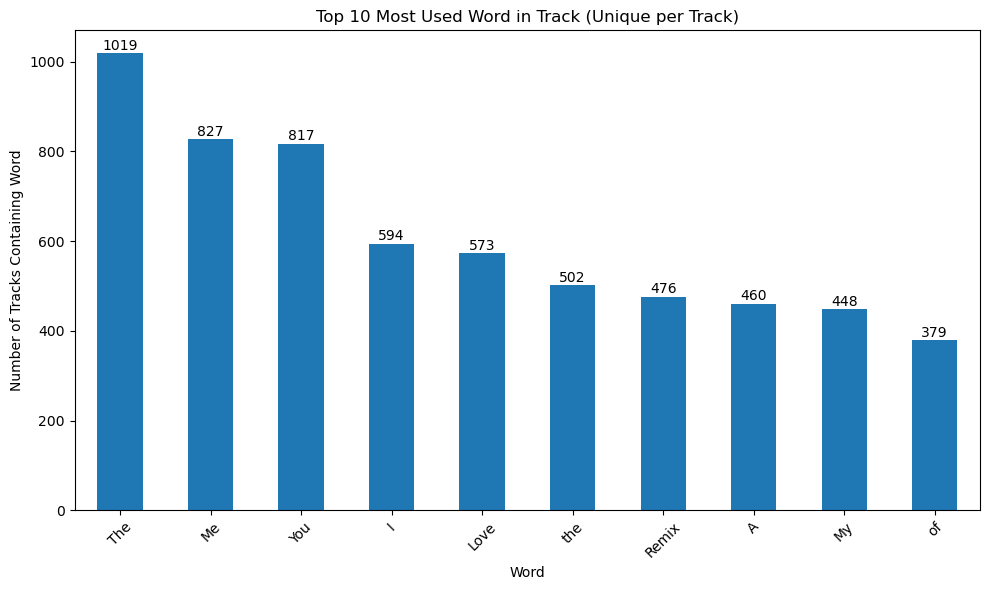

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Most Used Word in Track (Unique per Track)
df = pd.read_csv("Spotify Youtube Dataset.csv")

# Dataset
# Extract unique words from Track column and clean
df['words'] = df['Track'].apply(
    lambda x: list({w for w in str(x).split(" ") if w.isalpha() and w.lower() != "(feat."})
)

# Split into rows
words_series = df['words'].explode()

# Count in how many Tracks each word appears
top_words = words_series.value_counts().head(10)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_words.plot(kind='bar')
# Add label
for i, value in enumerate(top_words):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Top 10 Most Used Word in Track (Unique per Track)")
plt.xlabel("Word")
plt.ylabel("Number of Tracks Containing Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

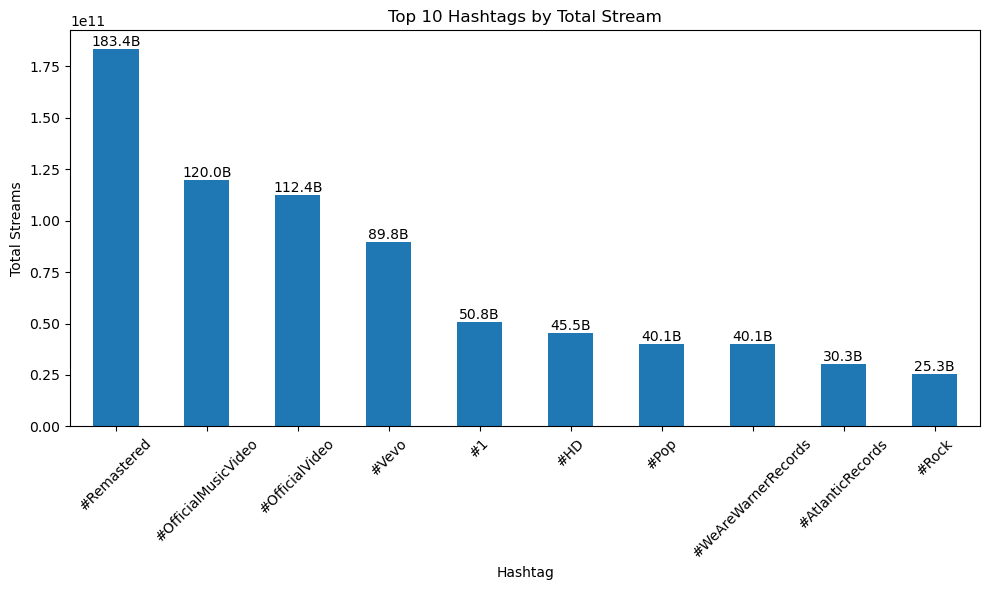

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Hashtag by Total Stream
df = pd.read_csv("Spotify Youtube Dataset.csv")

# Dataset
# Extract hashtags from Description
df['hashtags'] = df['Description'].apply(
    lambda x: re.findall(r"#\w+", str(x))  # find all words starting with "#"
)

# Split into rows
hashtags_df = df.explode('hashtags')

# Sum Stream per hashtag
top_hashtags = (
    hashtags_df.groupby('hashtags')['Stream']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Format function for numbers
def format_number(n):
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.1f}B"
    elif n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.1f}K"
    else:
        return str(n)

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_hashtags.plot(kind='bar')
# Add label
for i, value in enumerate(top_hashtags):
    plt.text(i, value, format_number(value), ha='center', va='bottom')
plt.title("Top 10 Hashtags by Total Stream")
plt.xlabel("Hashtag")
plt.ylabel("Total Streams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

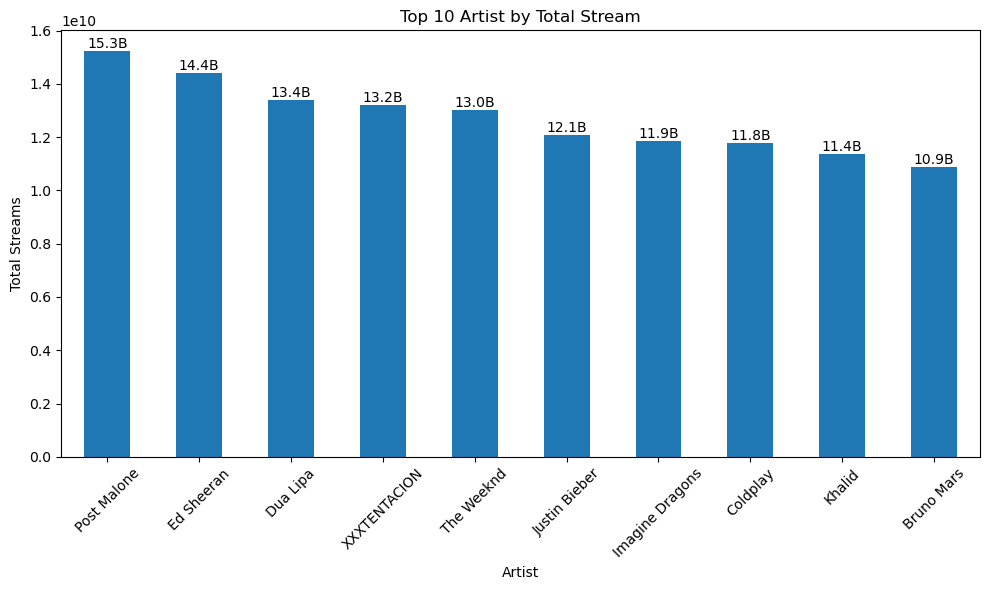

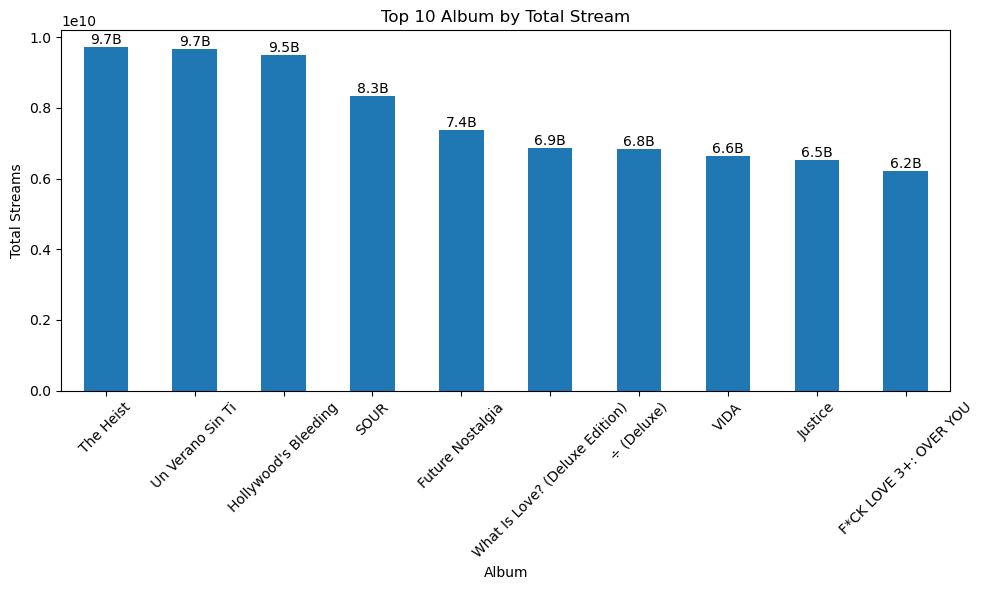

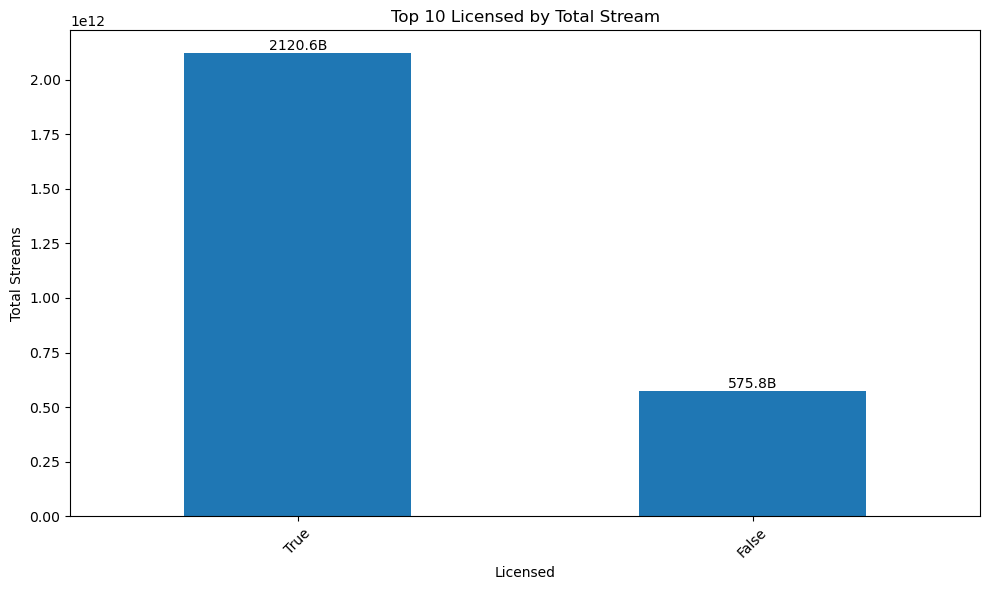

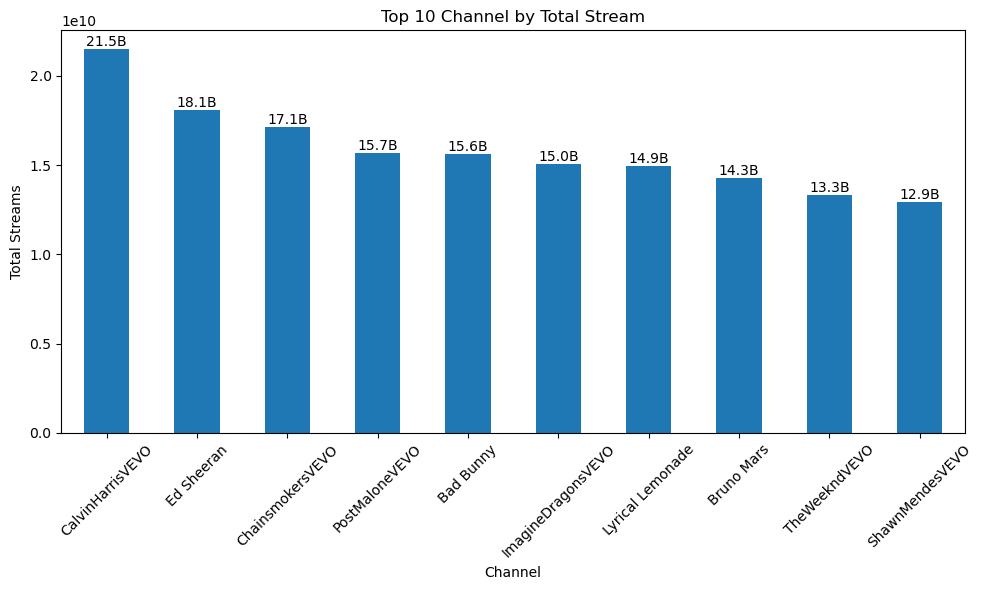

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Top 10 Artist / Album by Total Stream
target_col = ['Artist','Album','Licensed','Channel']

for dt in target_col:
    df = pd.read_csv("Spotify Youtube Dataset.csv")
    
    # Dataset
    # Sum Stream per Artist
    df = (
        df.groupby(dt)['Stream']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    
    # Format function for numbers
    def format_number(n):
        if n >= 1_000_000_000:
            return f"{n/1_000_000_000:.1f}B"
        elif n >= 1_000_000:
            return f"{n/1_000_000:.1f}M"
        elif n >= 1_000:
            return f"{n/1_000:.1f}K"
        else:
            return str(n)
    
    # Bar Chart
    plt.figure(figsize=(10, 6))
    ax = df.plot(kind='bar')
    # Add label
    for i, value in enumerate(df):
        plt.text(i, value, format_number(value), ha='center', va='bottom')
    plt.title(f"Top 10 {dt} by Total Stream")
    plt.xlabel(dt)
    plt.ylabel("Total Streams")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()